# Graph Theory Practice With Students

We will use the NetworkX Python package.

A tutorial at: https://networkx.org/documentation/stable/tutorial.html

A tutorial at: https://medium.com/swlh/a-tutorial-on-networkx-network-analysis-in-python-part-i-43c1d35830b6


In [1]:
import networkx as nx

Some basics with a Simple Graph G

In [2]:
G = nx.Graph()

In [3]:
# Add 4 nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

# Add 5 edges
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(1,4)
G.add_edge(1,3)

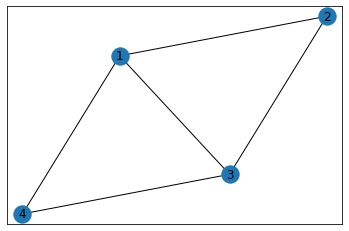

In [4]:
# One way to draw the Graph
nx.draw_networkx(G)

In [5]:
# To see the vertices and edges
print("Vertices:", G.nodes)
print("Edges:", G.edges)

Vertices: [1, 2, 3, 4]
Edges: [(1, 2), (1, 4), (1, 3), (2, 3), (3, 4)]


In [6]:
# Can iterate through these
for e in G.edges:
    print("From", e[0], "to", e[1])

From 1 to 2
From 1 to 4
From 1 to 3
From 2 to 3
From 3 to 4


In [7]:
# Add code to the above to count the number of edges and check against size()

In [8]:
G[1].keys()

KeysView(AtlasView({2: {}, 4: {}, 3: {}}))

Exercise on complete graph: Check that number of edges in $K_n$ actually equals $\dfrac{n(n-1)}{2}$

In [9]:
n = 7
Kn = nx.complete_graph(n)
print("Calculation:", n*(n-1)/2)
print("Num edges:", len(Kn.edges))
print("Size:", Kn.size())

Calculation: 21.0
Num edges: 21
Size: 21


Graph Representations

In [10]:
# Adjacency List Representation

print(G.adj)

{1: {2: {}, 4: {}, 3: {}}, 2: {1: {}, 3: {}}, 3: {2: {}, 4: {}, 1: {}}, 4: {3: {}, 1: {}}}


In [11]:
for a in G.adj:
    print(a)

1
2
3
4


In [12]:
# Adjacency Matrix

A_compressed = nx.adjacency_matrix(G)
A = A_compressed.todense()

print("Compressed Matrix Representation")
print(A_compressed)
print()

print("Whole Matrix")
print(A)
print()
print("Some entry (1,2):", A[1,2])

Compressed Matrix Representation
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 2)	1

Whole Matrix
[[0 1 1 1]
 [1 0 1 0]
 [1 1 0 1]
 [1 0 1 0]]

Some entry (1,2): 1


In [13]:
# Gives the number of unrestricted walks of length 3 between any two nodes

A**3

matrix([[4, 5, 5, 5],
        [5, 2, 5, 2],
        [5, 5, 4, 5],
        [5, 2, 5, 2]], dtype=int32)

In [14]:
G.degree(1)

3

In [15]:
# Get the whole "Degree Sequence"
nx.degree(G)

DegreeView({1: 3, 2: 2, 3: 3, 4: 2})

Directed Graph

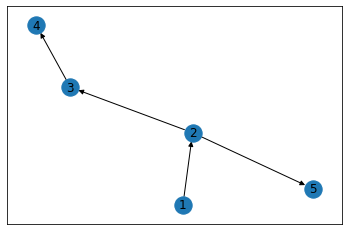

In [16]:
D = nx.DiGraph()

D.add_node(1)
D.add_node(2)
D.add_node(3)
D.add_node(4)
D.add_node(5)

D.add_edges_from([(1, 2), (2, 3), (3,4), (2,5)])

nx.draw_networkx(D)

In [17]:
print("Size:", D.size())
print("In degree of vertex 2:", D.in_degree(2) )
print("Out degree of vertex 2:", D.out_degree(2) )

Size: 4
In degree of vertex 2: 1
Out degree of vertex 2: 2


Some other properties of graphs

In [18]:
nx.diameter(G)

2

In [19]:
G1 = G.copy()

In [20]:
G1.add_node(8)
# Next line causes an error if graph is disconnected
# nx.diameter(G1)

In [21]:
# To avoid error in diameter call:
print("Should be True:", nx.is_connected(G))
print("Should be 1:", nx.number_connected_components(G))

print("Should be False:", nx.is_connected(G1))
print("Should be 2:", nx.number_connected_components(G1))

Should be True: True
Should be 1: 1
Should be False: False
Should be 2: 2


Random Graphs

In [22]:
R = nx.fast_gnp_random_graph(5, 0.5)

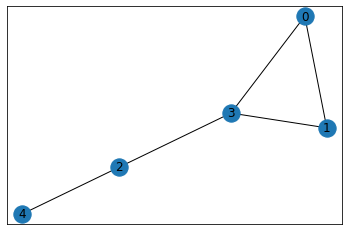

In [23]:
nx.draw_networkx(R)

In [24]:
'''
Try a larger random network. Is it typically connected as n grows?
'''
n = 15
p = 0.5
count = 0
print("Prob of disconnected less than:", n*(p**n))
for i in range(20):
    R = nx.fast_gnp_random_graph(n, p)
    if nx.is_connected(R):
        count += 1
        
count

Prob of disconnected less than: 0.000457763671875


20

In [25]:
'''
Do random networks yield small-world property?
'''

start_n = 1000
finish_n = 1002
p = 0.2
data = {}
for n in range(start_n, finish_n + 1):
    R = nx.fast_gnp_random_graph(n, p)
    data[n] = nx.diameter(R)
        
print(data)

{1000: 2, 1001: 2, 1002: 2}


Isomorphism Check

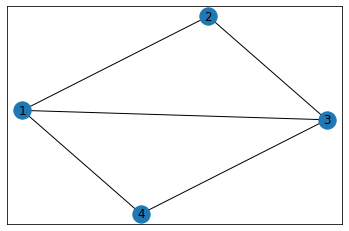

In [26]:
nx.draw_networkx(G)

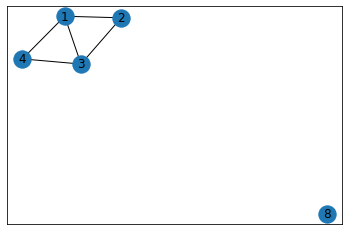

In [27]:
nx.draw_networkx(G1)

In [28]:
nx.is_isomorphic(G, G1)

False

In [29]:
nx.is_isomorphic(G1, G1)

True

In [30]:
'''
Find two random isomorphic graphs
'''
n = 5
p = 0.5
startR = nx.fast_gnp_random_graph(n, p)
while True:
    R = nx.fast_gnp_random_graph(n, p)
    if nx.is_isomorphic(startR, R):
        break
        

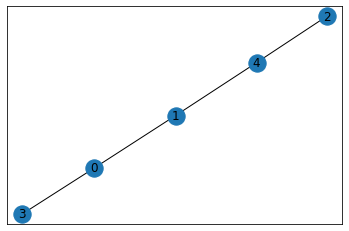

In [31]:
nx.draw_networkx(startR)

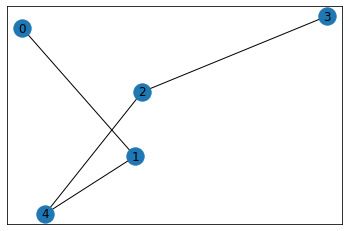

In [32]:
nx.draw_networkx(R)

Another Simple Graph, but now with some labels

In [33]:
G2 = nx.Graph()

In [34]:
G2.add_nodes_from([

    (4, {"color": "red"}),

    (5, {"color": "green"}),

])

In [35]:
G2.add_edge(1, 2, weight = 4, color = 'red')
G2.add_edge(2, 3, weight = 2, color = 'red')
G2.add_edge(3, 4, weight = 4, color = 'blue')
G2.add_edge(3, 5, weight = 9, color = 'red')

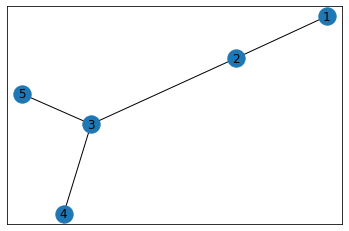

In [36]:
nx.draw_networkx(G2)

In [37]:
G2.nodes

NodeView((4, 5, 1, 2, 3))

In [38]:
D = G2.get_edge_data(1,2).values()
print(D)

dict_values([4, 'red'])


In [39]:
# D['color'] Causes error - how get this info individually

In [40]:
type(D)

dict_values

In [41]:
for x in D:
    print(x)

4
red
